In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
%matplotlib inline

In [2]:
file_name =  "Dataset.xlsx"
sheet =  'Heart3'

df = pd.read_excel(io=file_name, sheet_name=sheet)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [3]:
df=df[['BMI', 'Smoking', 'Sex', 'GenHealth', 'SleepTime','SkinCancer']]
df

,BMI,Smoking,Sex,GenHealth,SleepTime,SkinCancer
0,16.60,Yes,Female,Very good,5,Yes
1,20.34,No,Female,Very good,7,No
2,26.58,Yes,Male,Fair,8,No
3,24.21,No,Female,Good,6,Yes
4,23.71,No,Female,Very good,8,No
...,...,...,...,...,...,...
319790,27.41,Yes,Male,Fair,6,No
319791,29.84,Yes,Male,Very good,5,No
319792,24.24,No,Female,Good,6,No
319793,32.81,No,Female,Good,12,No


In [4]:
df.isnull().any()

BMI           False
Smoking       False
Sex           False
GenHealth     False
SleepTime     False
SkinCancer    False
dtype: bool

In [5]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df['Sex'] = enc.fit_transform(df['Sex'])
df['GenHealth'] = enc.fit_transform(df['GenHealth'])
df['Smoking'] = enc.fit_transform(df['Smoking'])
df['SkinCancer'] = enc.fit_transform(df['SkinCancer'])

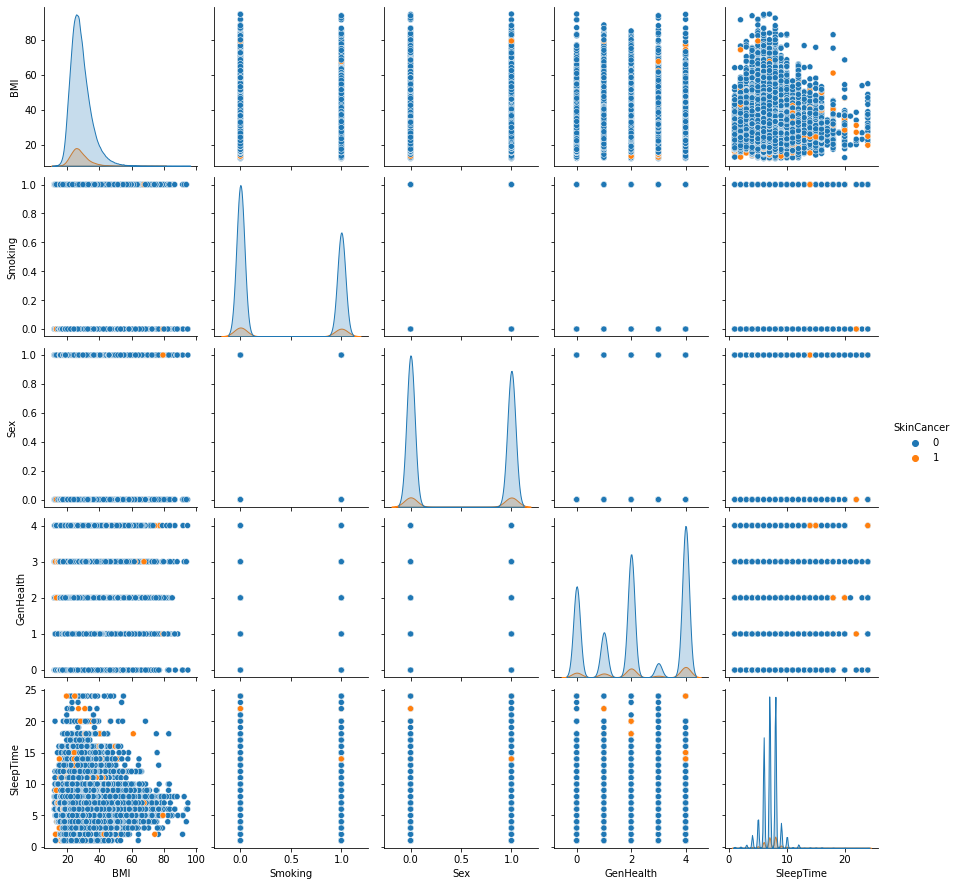

In [6]:
sns.pairplot(data=df, hue = 'SkinCancer')

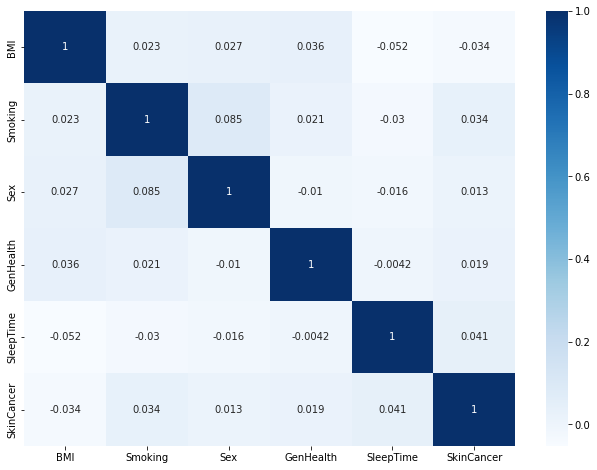

In [7]:
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.show()

In [8]:
target = df['SkinCancer']
df = df.drop('SkinCancer', axis =1)


X = df
Y = target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)  

## Logistic Regression

In [9]:
#logistic regression
from sklearn import linear_model

LRG = linear_model.LogisticRegression(random_state = 42,solver = 'liblinear').fit(X_train, y_train)
LRG.score(X_train, y_train)

0.9068153035538392

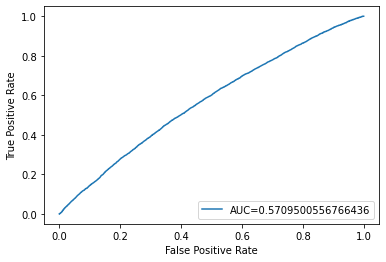

In [11]:
#AUC
y_pred_proba = LRG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [12]:
# https://stackoverflow.com/a/61517038/9848043
y_test.reset_index(drop=True)

0        0
1        1
2        0
3        0
4        1
        ..
63954    1
63955    0
63956    1
63957    0
63958    0
Name: SkinCancer, Length: 63959, dtype: int64

In [13]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
y_preds=LRG.predict(X_test)
predicted = y_preds
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0],zero_division=1)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[    0  5979]
 [    0 57980]]
Outcome values : 
 0 5979 0 57980
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.00      5979
           0       0.91      1.00      0.95     57980

    accuracy                           0.91     63959
   macro avg       0.95      0.50      0.48     63959
weighted avg       0.92      0.91      0.86     63959



## Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100) 

clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8878969339733267


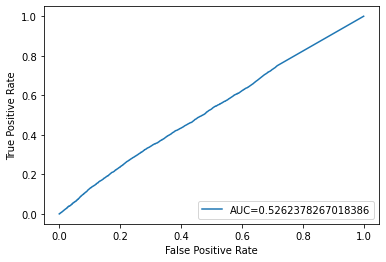

In [16]:
#AUC
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [17]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
y_preds=clf.predict(X_test)
predicted = y_preds
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0],zero_division=1)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[  170  5809]
 [ 1361 56619]]
Outcome values : 
 170 5809 1361 56619
Classification report : 
               precision    recall  f1-score   support

           1       0.11      0.03      0.05      5979
           0       0.91      0.98      0.94     57980

    accuracy                           0.89     63959
   macro avg       0.51      0.50      0.49     63959
weighted avg       0.83      0.89      0.86     63959



## K-Nearest Neighbours

In [18]:
from sklearn.neighbors import KNeighborsClassifier

K = []
training = []
test = []
scores = {}
  
for k in range(2, 26):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

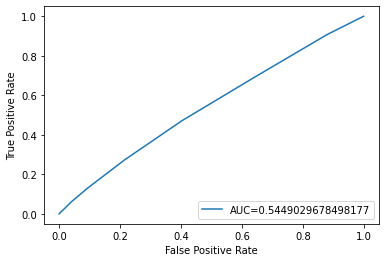

In [20]:
#AUC
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [21]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9068231210619303, 0.8979658843946904]
3 : [0.9007020122265826, 0.8838474647821261]
4 : [0.9068231210619303, 0.9032974249128348]
5 : [0.9052947982301162, 0.8989352553979894]
6 : [0.9068113947997937, 0.9057208524210822]
7 : [0.9066003220813333, 0.9042042558514048]
8 : [0.9068426648321581, 0.9060335527447271]
9 : [0.9068270298159758, 0.9055801372754421]
10 : [0.9068622086023859, 0.9063306180521897]
11 : [0.9068348473240669, 0.9060804577932738]
12 : [0.9068270298159758, 0.9064556981816476]
13 : [0.9068543910942948, 0.9063775231007364]
14 : [0.9068113947997937, 0.9064869682140121]
15 : [0.9067918510295658, 0.9064713331978299]
16 : [0.906807486045748, 0.9065182382463766]
17 : [0.9067996685376569, 0.9064713331978299]
18 : [0.9068153035538392, 0.9065182382463766]
19 : [0.9068113947997937, 0.9065026032301944]
20 : [0.9068153035538392, 0.9065182382463766]
21 : [0.906807486045748, 0.9065182382463766]
22 : [0.9068153035538392, 0.9065182382463766]
23 : [0.9068153035538392, 0.9065182382463766

In [22]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
y_preds=clf.predict(X_test)
predicted = y_preds
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0],zero_division=1)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[    0  5979]
 [    0 57980]]
Outcome values : 
 0 5979 0 57980
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.00      5979
           0       0.91      1.00      0.95     57980

    accuracy                           0.91     63959
   macro avg       0.95      0.50      0.48     63959
weighted avg       0.92      0.91      0.86     63959



/Users/joyanta/miniforge3/envs/tensorflow_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


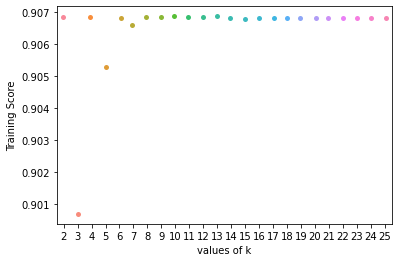

In [23]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

/Users/joyanta/miniforge3/envs/tensorflow_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


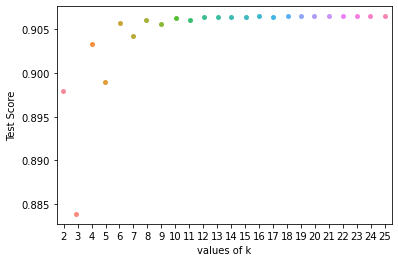

In [24]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

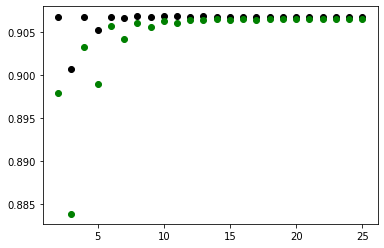

In [25]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

## Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 90.65182382463766


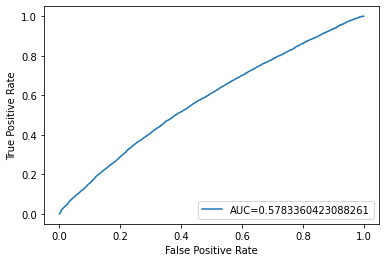

In [28]:
#AUC
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [29]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
y_preds=gnb.predict(X_test)
predicted = y_preds
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0],zero_division=1)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[    0  5979]
 [    0 57980]]
Outcome values : 
 0 5979 0 57980
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.00      5979
           0       0.91      1.00      0.95     57980

    accuracy                           0.91     63959
   macro avg       0.95      0.50      0.48     63959
weighted avg       0.92      0.91      0.86     63959



## Support Vector Machine

In [30]:
# import support vector classifier
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
# clf = SVC(kernel='linear') #it takes too much time to train up
clf = LinearSVC(random_state=42, tol=1e-5)
# fitting x samples and y classes
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("SVM model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

SVM model accuracy(in %): 90.65182382463766


/Users/joyanta/miniforge3/envs/tensorflow_3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


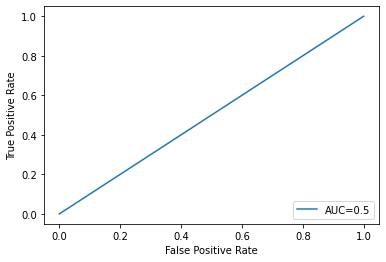

In [36]:
#AUC
y_pred_proba = clf.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [37]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
y_preds=clf.predict(X_test)
predicted = y_preds
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0],zero_division=1)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[    0  5979]
 [    0 57980]]
Outcome values : 
 0 5979 0 57980
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.00      5979
           0       0.91      1.00      0.95     57980

    accuracy                           0.91     63959
   macro avg       0.95      0.50      0.48     63959
weighted avg       0.92      0.91      0.86     63959

